In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
print("This task is done by Palle Sai Punith Reddy")

This task is done by Palle Sai Punith Reddy


# <font color="blue"> Data Collection and Preprocessing

In [3]:
#reading the dataset
t=pd.read_csv("Titanic.csv")

In [4]:
#reading first 5 rows
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#information about the data
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
#checking the shape of the data
t.shape

(418, 12)

In [7]:
#checking the size
t.size

5016

In [8]:
#checking is there any null values
t.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [9]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
t.isnull().sum().sum()

414

# <font color="blue"> Handling the Data

In [11]:
#drop the Cabin column from the dataframe
t=t.drop(columns="Cabin",axis=1)

In [12]:
#dropping Name column
t=t.drop(columns="Name",axis=1)

In [13]:
#dropping Ticket Column
t=t.drop(columns="Ticket",axis=1)

In [14]:
t.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [15]:
#replacing the missing values with mean value of age for age column
t["Age"].fillna(t["Age"].mean(),inplace=True)

In [16]:
#also replacing the value from Fare column
t["Fare"].fillna(t["Fare"].mean(),inplace=True)

In [17]:
t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# <font color="blue"> Data Analysis

In [18]:
#checking the statistical description
t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
t["Survived"].value_counts()
#number of people survived and not-survived

0    266
1    152
Name: Survived, dtype: int64

In [20]:
#number of males and females
t["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

# <font color="blue"> Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

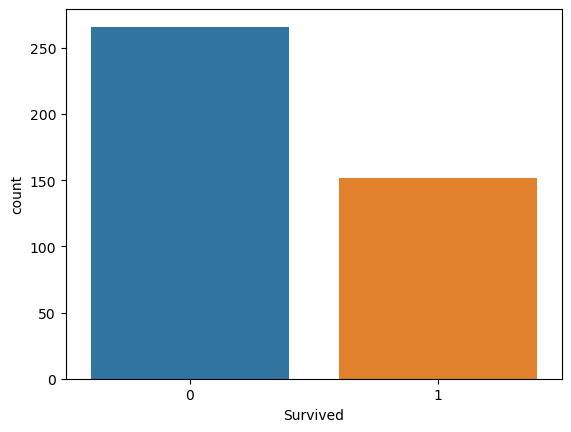

In [21]:
sns.countplot(x='Survived',data=t)

<Axes: xlabel='Sex', ylabel='count'>

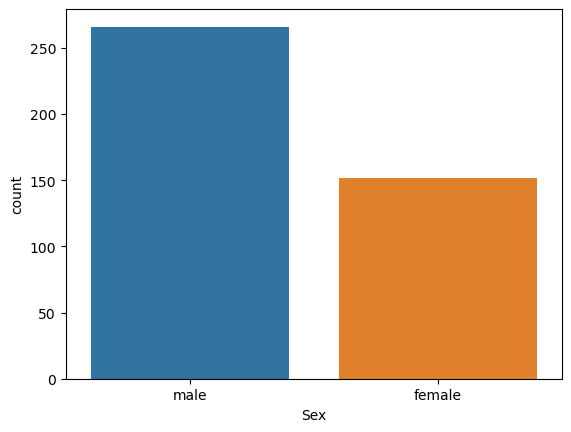

In [22]:
sns.countplot(x='Sex',data=t)

<Axes: xlabel='Pclass', ylabel='count'>

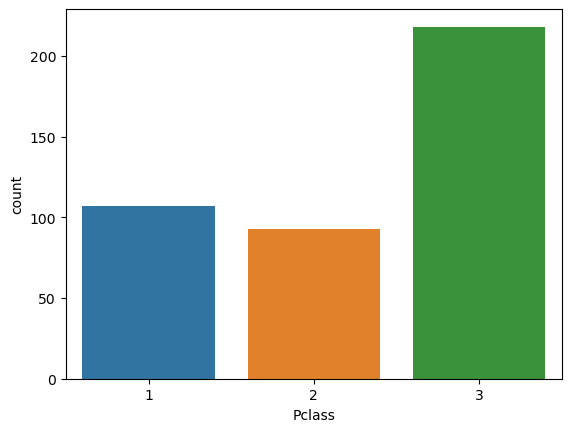

In [23]:
sns.countplot(x='Pclass',data=t)

<Axes: xlabel='Pclass', ylabel='count'>

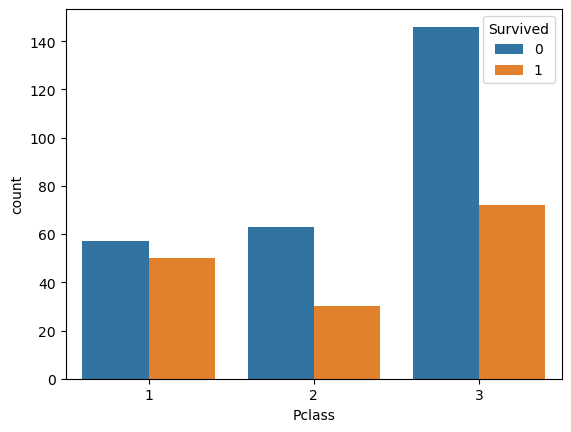

In [24]:
sns.countplot(x='Pclass',hue="Survived",data=t)

In [25]:
corr=t.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.030874,0.003818,0.043080,0.008209
Survived,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191382
Pclass,-0.026751,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.576619
Age,-0.030874,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.326800
SibSp,0.003818,0.099943,0.001087,-0.079535,1.000000,0.306895,0.171488
Parch,0.043080,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230001
Fare,0.008209,0.191382,-0.576619,0.326800,0.171488,0.230001,1.000000


# <font color="blue"> Encoding the Categorical Column

In [26]:
#to plot heatmap we have tyo convert string values to float
t["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [27]:
t["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [28]:
#changing sex and Embarked column to float
t.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [29]:
t.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0
5,897,0,3,0,14.0,0,0,9.2250,0
6,898,1,3,1,30.0,0,0,7.6292,2
7,899,0,2,0,26.0,1,1,29.0000,0
8,900,1,3,1,18.0,0,0,7.2292,1
9,901,0,3,0,21.0,2,0,24.1500,0


<Axes: >

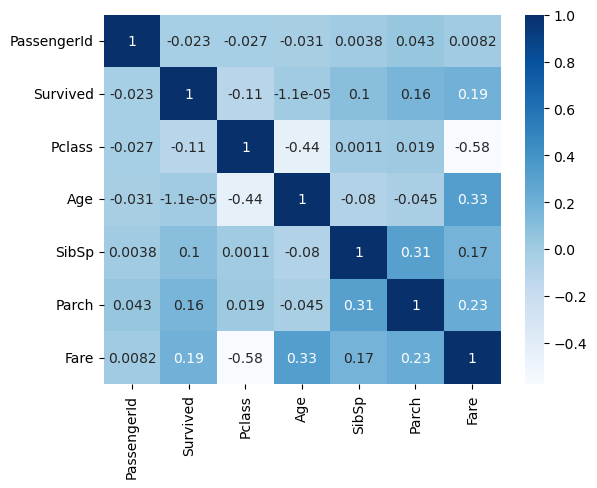

In [30]:
sns.heatmap(corr,annot=True,cmap="Blues")

In [31]:
t.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [32]:
x=t[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']]

In [33]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [34]:
y=t["Survived"]

In [35]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# <font color="blue"> Splitting data into training and testing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x.shape,x_test.shape,x_train.shape

((418, 7), (84, 7), (334, 7))

In [39]:
y.shape,y_test.shape,y_train.shape

((418,), (84,), (334,))

# <font color="blue"> Models Training

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_reg=LogisticRegression()

In [42]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_Pred_log=log_reg.predict(x_test)

In [44]:
y_Pred_log

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [46]:
print(accuracy_score(y_test,y_Pred_log))

1.0


In [47]:
print(classification_report(y_test,y_Pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [48]:
print(confusion_matrix(y_test,y_Pred_log))

[[50  0]
 [ 0 34]]
